<a href="https://colab.research.google.com/github/kavyasree761/hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**Importing libraries**

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


**Mounting google drive**

In [ ]:
#mounting google drive
from google.colab import drive            
drive.mount('/content/drive')

Mounted at /content/drive


**Copying the path**

In [ ]:
#copying the path
path='/content/drive/MyDrive/Colab Notebooks/Hotel Bookings.csv'
data=pd.read_csv(path)

In [ ]:
#Accessing rows and columns
print(data.shape)

(119390, 32)


In [ ]:
#printing first 5 rows of data
print(data.head())

          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1     

In [ ]:
#printing all the column names of data
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#describing the data
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
print(dict(data))

{'hotel': 0         Resort Hotel
1         Resort Hotel
2         Resort Hotel
3         Resort Hotel
4         Resort Hotel
              ...     
119385      City Hotel
119386      City Hotel
119387      City Hotel
119388      City Hotel
119389      City Hotel
Name: hotel, Length: 119390, dtype: object, 'is_canceled': 0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64, 'lead_time': 0         342
1         737
2           7
3          13
4          14
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 119390, dtype: int64, 'arrival_date_year': 0         2015
1         2015
2         2015
3         2015
4         2015
          ... 
119385    2017
119386    2017
119387    2017
119388    2017
119389    2017
Name: arrival_date_year, Length: 119390, dtype: int64, 'arrival_date_month': 0           July
1  

**Cleaning data**


**Dropping duplicates**

In [ ]:
#dropping the duplicate values
data.drop_duplicates(inplace=True)
data.shape

(87396, 32)

**Checking null values**

In [ ]:
#checking for null values
data.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [ ]:
#printing the percentage of null values
print((data.isnull().sum()/len(data.index))*100)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004577
babies                             0.000000
meal                               0.000000
country                            0.517186
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [ ]:
#removing the most null values column named company
data=data.drop(['company'],axis=1)

In [ ]:
#filling null values with zero
data['agent']=data['agent'].fillna(0)

In [ ]:
#dropping rows with null values
data=data.dropna(axis=0)

In [ ]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

**Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

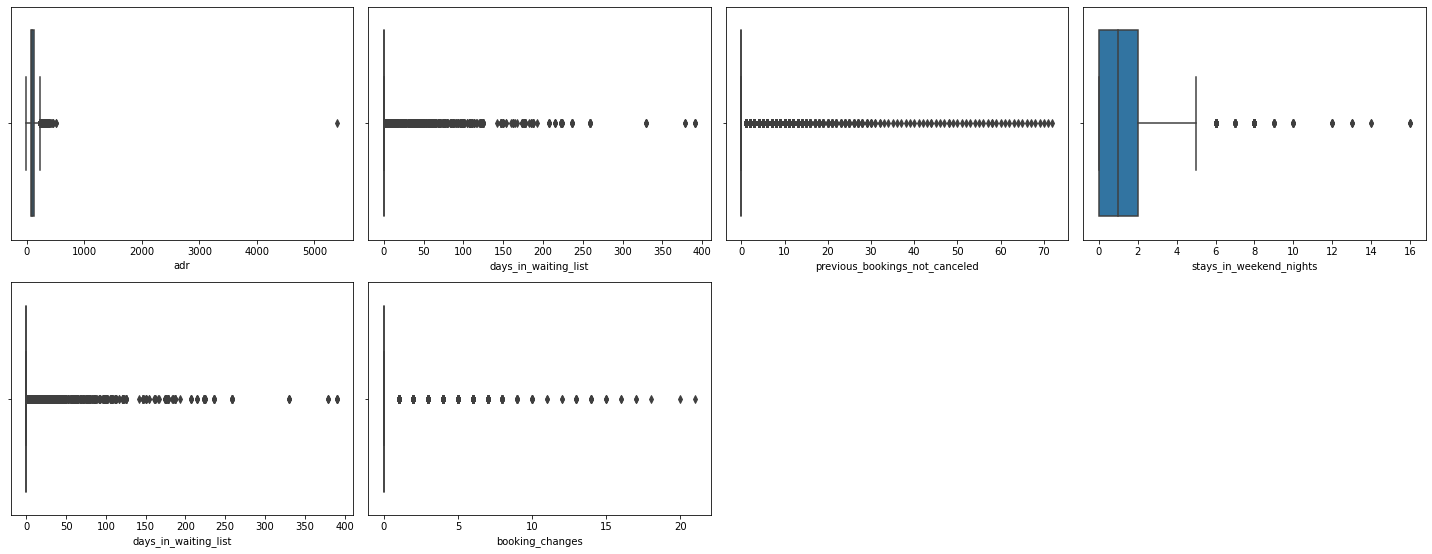

In [ ]:
#boxplot for analysing outliers
test_list = ['adr', 'days_in_waiting_list', 'previous_bookings_not_canceled', 'stays_in_weekend_nights', 'days_in_waiting_list', 'booking_changes']
plt.figure(figsize=(20,15))
n=1
for test in test_list:
  plt.subplot(4,4,n)
  sns.boxplot(data[test])
  n=n+1
  plt.tight_layout()

In [ ]:
#dropping adr outliers
data.drop(data[data['adr'] > 5200].index, inplace = True)

**Type of hotel and its percentage**

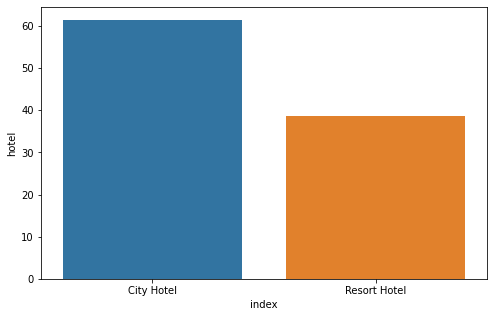

In [ ]:
d1=(data['hotel'].value_counts(normalize=True)*100).reset_index().rename(columns={0:'index'})
plt.figure(figsize=(8,5))

#plotting barplot
sns.barplot(y=d1['hotel'],x=d1['index'])
plt.show()



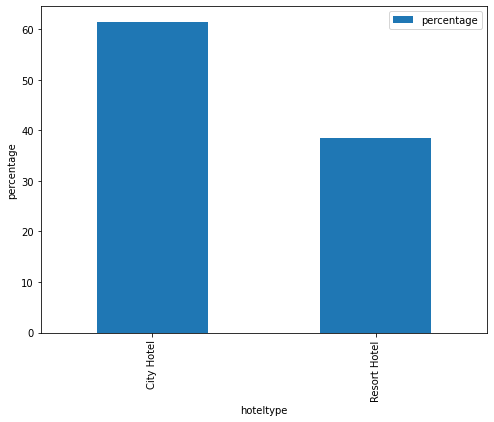

In [ ]:
d5= (data['hotel'].value_counts(normalize=True)*100).reset_index()
d5.columns=['hoteltype','percentage']

#plotting graph
d5.plot('hoteltype','percentage', xlabel = 'hoteltype', ylabel = 'percentage',kind='bar',figsize=(8,6))

**Type of meal ordered**

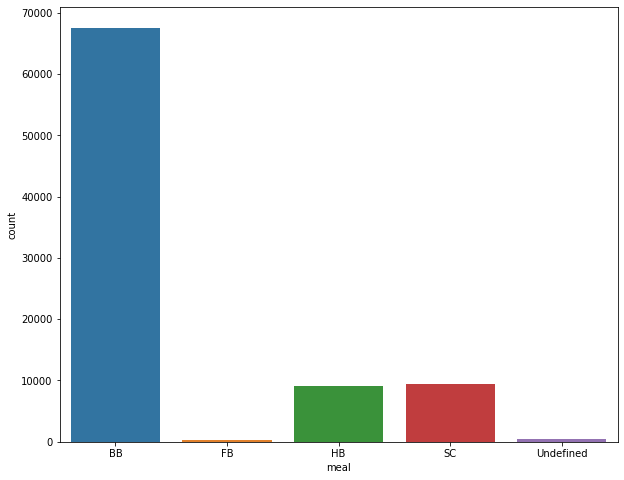

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = data['meal'])
plt.show()

In [ ]:
d2=(data['country'].value_counts(normalize=True)*100).reset_index().rename(columns={0:'index'})
d2

,index,country
0,PRT,31.571562
1,GBR,12.000368
2,FRA,10.164598
3,ESP,8.341481
4,DEU,6.196299
...,...,...
172,MMR,0.001150
173,BFA,0.001150
174,CYM,0.001150
175,MLI,0.001150


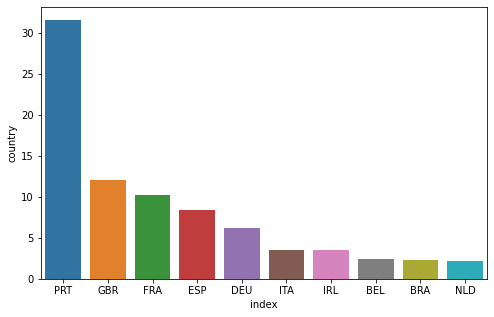

In [ ]:
plt.figure(figsize=(8,5))
d2=d2[:10]
#plotting barplot
sns.barplot(y=d2['country'],x=d2['index'])
plt.show()

In [ ]:
heat = data[['adr', 'days_in_waiting_list', 'previous_bookings_not_canceled', 'stays_in_weekend_nights', 'days_in_waiting_list', 'booking_changes']]
corr_df = heat.corr()
corr_df

,adr,days_in_waiting_list,previous_bookings_not_canceled,stays_in_weekend_nights,days_in_waiting_list,booking_changes
adr,1.000000,-0.035300,-0.087576,0.039254,-0.035300,0.000752
days_in_waiting_list,-0.035300,1.000000,-0.006054,-0.032018,1.000000,0.024215
previous_bookings_not_canceled,-0.087576,-0.006054,1.000000,-0.054143,-0.006054,0.006029
stays_in_weekend_nights,0.039254,-0.032018,-0.054143,1.000000,-0.032018,0.049078
days_in_waiting_list,-0.035300,1.000000,-0.006054,-0.032018,1.000000,0.024215
booking_changes,0.000752,0.024215,0.006029,0.049078,0.024215,1.000000


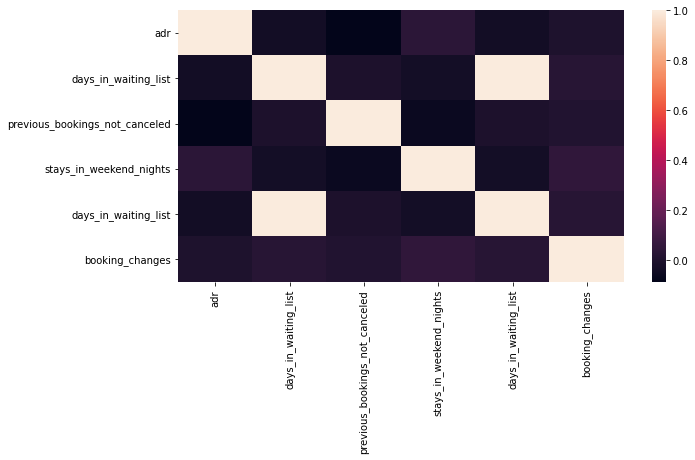

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

**optimal length of stay to get best daily price**